# EasyOCR
<img src="https://blog.kakaocdn.net/dn/pXiuH/btrqsGvQ5uj/ZV6LAYLk7YBYPp3REB9erk/img.jpg" height="200" title="EasyOCR" alt="EasyOCR"></img>

[EasyOCR][easy_ocr_link]은 문자 영역 인식(Detection), 문자 인식(Recognition)을 손쉽게 수행 할 수 있도록 하는 Python 패키지 입니다. EasyOCR은 구현이 간단하고 매우 직관적입니다. 현재 [80개이상의 언어][supported_lang_link]를 지원하고 있으며, 꾸준히 Releases 되고 있습니다. 

최근에는 손글씨 인식을 목표로 하고 있습니다.

[easy_ocr_link]: https://github.com/JaidedAI/EasyOCR "Go EasyOCR"
[supported_lang_link]: https://www.jaided.ai/easyocr/ "Go EasyOCR"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install the necessary packages

In [ ]:
!pip install easyocr
!pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.2/619.2 KB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 15.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.68
    Uninstalling opencv-python-headless-4.7.0.68:
      Successfully uninstalled opencv-python-headless-4.7.0.68
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 16.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.4.60
    Uninstalling opencv-python-headless-4.5.4.60:
      Succes

### Colab에 설치된 한글 폰트가 없기때문에 나눔고딕 폰트를 인스톨합니다.

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 128208 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [ ]:
import matplotlib.font_manager as fm

sys_font=fm.findSystemFonts()

nanum_font = [f for f in sys_font if 'Nanum' in f]
nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/

### Import Packages

In [ ]:
from matplotlib import pyplot as plt
from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import imutils
from easyocr import Reader
import cv2
import requests
import numpy as np
from PIL import ImageFont, ImageDraw, Image

### Function
Colab에서 이미지를 확인하기위한 Function과 [이전 자료][scan_ocr_link]에서 설명한 Scan 이미지로 변환하는 방법을 Function으로 만들어 사용하도록 하겠습니다. 추가로 OpenCV putText의 경우 한글지원이 되지 않기때문에 한글을 표기하기 위한 Function을 만들어 사용합니다.


[scan_ocr_link]: https://colab.research.google.com/drive/1Uz9N7BbVX6qNrpRGHGOcZuW0XY00a1iw#scrollTo=DBnitJHymyMs "Go Scan OCR"

In [ ]:
#75 200 디폴트 / 
def make_scan_image(image,width,ksize=(5,5),min_threshold=75,max_threshold=200):
    image_list_title = []
    image_list = []
    
    org_image = image.copy()
    image = imutils.resize(image, width=width)
    ratio = org_image.shape[1] / float(image.shape[1])
    
    # 이미지를 grayscale로 변환하고 blur를 적용
    # 모서리르 ㄹ 찾기위한 이미지 연산
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, ksize, 1)
    edged = cv2.Canny(blurred, min_threshold, max_threshold)
    
    image_list_title = ['gray', 'blurred', 'edged']
    image_list = [gray, blurred, edged]
    
    # contours를 찾아 크기순으로 정렬
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
    
    findCnt = None
    
    # 정렬된 contours를 반복문으로 수행하며 4개의 꼭지점을 갖는 도형을 검출
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02*peri, True)
        
        # contours가 크기순으로 정렬되어 있기 때문에 제일 첫번째 사각형을 영역으로 판단하고 break
        if len(approx) ==4:
            findCnt = approx
            break
        
    
    if findCnt is None :
        raise Exception(("Could not find out line"))
    output = image.copy()
    cv2.drawContours(output, [findCnt], -1, (0,255,0),2)
    
    image_list_title.append("Outline")
    image_list.append(output)
    
    # 원본 이미지에 찾은 윤곽을 기준으로 이미지를 보정
    transform_image = four_point_transform(org_image, findCnt.reshape(4,2)*ratio)
    
    plt_imshow(image_list_title, image_list)
    plt_imshow("Transform",transform_image )
    
    return transform_image





def putText(cv_img, text, x, y, color=(0, 0, 0), font_size=22):
  # Colab이 아닌 Local에서 수행 시에는 gulim.ttc 를 사용하면 됩니다.
  # font = ImageFont.truetype("fonts/gulim.ttc", font_size)
  font = ImageFont.truetype('/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', font_size)
  img = Image.fromarray(cv_img)
   
  draw = ImageDraw.Draw(img)
  draw.text((x, y), text, font=font, fill=color)

  cv_img = np.array(img)
  
  return cv_img





In [ ]:
def plt_imshow(title='image',img=None, figsize=(8,5)):
    plt.figure(figsize=figsize)
    
    if type(img) == list :
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <=2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else :
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1,len(img), i +1),plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
        plt.show()
    
    else :
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
        else :
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

### Load Image

In [ ]:
from google.colab.patches import cv2_imshow


img_path = '/content/drive/MyDrive/Colab Notebooks/laoimg4.png'

org_image = cv2.imread(img_path,cv2.IMREAD_COLOR)

#img2 = cv2.imread("name5.jpg", cv2.IMREAD_COLOR)
# plt_imshow("org",org_image)


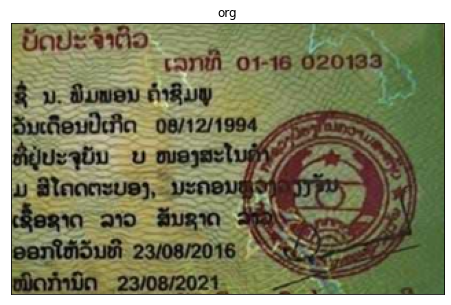

In [ ]:
# url = 'https://user-images.githubusercontent.com/69428232/155486780-55525c3c-8f5f-4313-8590-dd69d4ce4111.jpg'

# image_nparray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
# org_image = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR) 
# plt_imshow("orignal image", org_image)

plt_imshow("org",org_image)


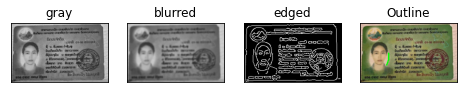

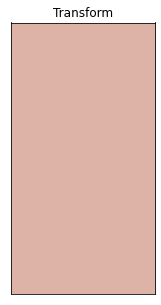

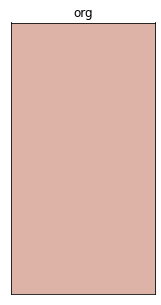

In [ ]:
business_card_image = make_scan_image(org_image, width=200, ksize=(5,5), min_threshold=50, max_threshold=100)
plt_imshow("org",business_card_image)

# print("이름 : 임 해 성")
# print("직급 : 연구윈")
# print("기업 : (주)에스앰소프트")
# print("폰번호: 10.6648.7547")
# print("E-mail: hs.lim@smsoft.co.kr")


# save_file = "/content/drive/MyDrive/Colab Notebooks/nametest.jpg"

# cv2.imwrite(save_file, business_card_image)





In [ ]:
# gray = cv2.cvtColor(business_card_image, cv2.COLOR_BGR2GRAY)
# (H,W) = gray.shape

# rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50,30))
# sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT,(125,30))

# gray = cv2.GaussianBlur(gray, (11,11),0)
# blackhat = cv2.morphologyEx(gray,cv2.MORPH_BLACKHAT, rectKernel)

# grad = cv2.Sobel(blackhat, ddepth = cv2.CV_32F, dx=1, dy=0, ksize=-1)
# grad = np.absolute(grad)
# (minVal, maxVal) = (np.min(grad), np.max(grad))
# grad = (grad - minVal) / (maxVal - minVal)
# grad = (grad * 255).astype("uint8")
 
# grad = cv2.morphologyEx(grad, cv2.MORPH_CLOSE, rectKernel)
# thresh = cv2.threshold(grad, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
 
# close_thresh = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, sqKernel)
# se = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 3)) # 가로 5, 세로 3
# close_thresh = cv2.erode(close_thresh, se, iterations=2)
 
# plt_imshow(["Original", "Blackhat", "Gradient", "Rect Close", "Square Close"], [business_card_image, blackhat, grad, thresh, close_thresh], figsize=(16, 10))

# plt_imshow(["Square Close"],[close_thresh], figsize=(16,10))

### Using EasyOCR for Optical Character Recognition
EasyOCR의 사용은 매우 간단합니다. 언어와 GPU 사용여부를 선택하고 이미지를 넣기만 하면 됩니다. GPU 사용여부에 따라 속도차이가 있습니다. 경험해보기 위해 런타임 유형에서 하드웨어 가속을 ```None```으로 하여 수행해보고, 다시 ```GPU```로 변경하여 수행해보시기 바랍니다.

In [ ]:
langs = ['la']

print("[INFO] OCR'ing input image...")
reader = Reader(lang_list=langs, gpu=True)
results = reader.readtext(org_image)
results

[INFO] OCR'ing input image...


[([[4, 0], [104, 0], [104, 24], [4, 24]], 'únusó12', 0.04802014693425193),
 ([[162, 20], [273, 20], [273, 40], [162, 40]],
  '01-16 020133',
  0.8154567134169298),
 ([[39, 40], [150, 40], [150, 64], [39, 64]],
  'duneu 618uw',
  0.08546364255973102),
 ([[0, 62], [96, 62], [96, 86], [0, 86]], ';ucåeudråa', 0.1434850920395766),
 ([[102, 65], [183, 65], [183, 85], [102, 85]],
  '00/12/1994',
  0.7877919125411771),
 ([[0, 84], [76, 84], [76, 110], [0, 110]], 'Pquz)bu', 0.025530818776267356),
 ([[102, 84], [174, 84], [174, 112], [102, 112]],
  'ouejazlu',
  0.18712210948956698),
 ([[13, 106], [108, 106], [108, 135], [13, 135]],
  'Blaonzue)',
  0.24342051162359915),
 ([[115, 113], [167, 113], [167, 129], [115, 129]],
  'Urnbui',
  0.02166463550666457),
 ([[0, 128], [57, 128], [57, 158], [0, 158]], '80819', 0.5754307506936746),
 ([[63, 137], [93, 137], [93, 153], [63, 153]], '212', 0.20501129028134127),
 ([[103, 133], [155, 133], [155, 153], [103, 153]],
  '0u810',
  0.11041364166256097),
 (

결과값은 추출된 글자에 대해 각 4개의 꼭지점 좌표(Top-Left, Top-Right, Bottom-Right, Bottom-Left)와 인식한 글자, 확률(Probability)을 리스트 형태로 Return 합니다.

In [ ]:

# 정규표현식
import re

```detail=0```으로 설정하면 인식된 글자만 추출 List 형태로 Return 됩니다.

In [ ]:
simple_results = reader.readtext(org_image, detail = 0)
simple_results

['únusó12',
 '01-16 020133',
 'duneu 618uw',
 ';ucåeudråa',
 '00/12/1994',
 'Pquz)bu',
 'ouejazlu',
 'Blaonzue)',
 'Urnbui',
 '80819',
 '212',
 '0u810',
 'enfóiãuå 23/08/2016',
 'nomfn',
 '23/08/2021',
 'ranú']

In [ ]:
# loop over the results
for (bbox, text, prob) in results:
  print("[INFO] {:.4f}: {}".format(prob, text))
  
  (tl, tr, br, bl) = bbox
  tl = (int(tl[0]), int(tl[1]))
  tr = (int(tr[0]), int(tr[1]))
  br = (int(br[0]), int(br[1]))
  bl = (int(bl[0]), int(bl[1]))

	# 추출한 영역에 사각형을 그리고 인식한 글자를 표기합니다.
  cv2.rectangle(org_image, tl, br, (0, 255, 0), 2)
  org_image = putText(org_image, text, tl[0], tl[1] - 60, (0, 255, 0), 20)
	#cv2.putText(business_card_image, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

[INFO] 0.0480: únusó12
[INFO] 0.8155: 01-16 020133
[INFO] 0.0855: duneu 618uw
[INFO] 0.1435: ;ucåeudråa
[INFO] 0.7878: 00/12/1994
[INFO] 0.0255: Pquz)bu
[INFO] 0.1871: ouejazlu
[INFO] 0.2434: Blaonzue)
[INFO] 0.0217: Urnbui
[INFO] 0.5754: 80819
[INFO] 0.2050: 212
[INFO] 0.1104: 0u810
[INFO] 0.1359: enfóiãuå 23/08/2016
[INFO] 0.0869: nomfn
[INFO] 0.9046: 23/08/2021
[INFO] 0.3858: ranú


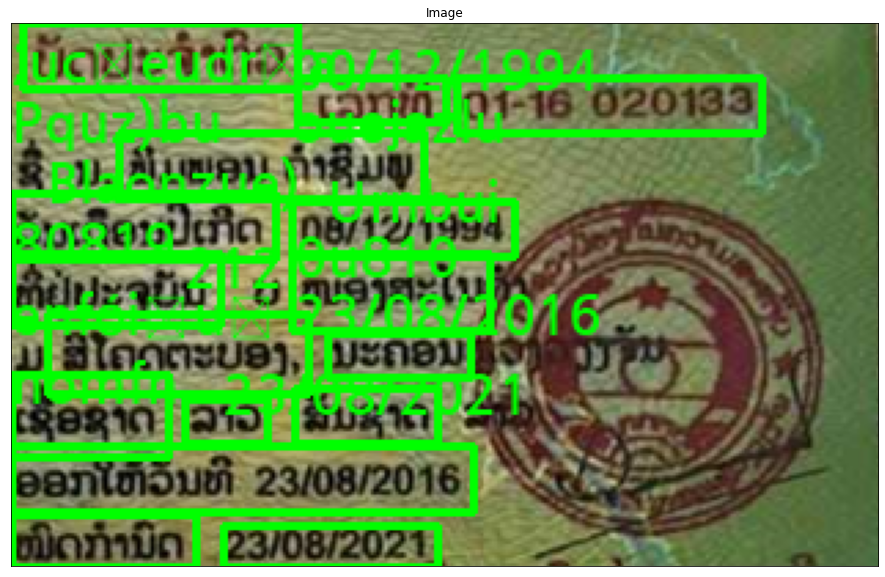

In [ ]:
# show the output image
plt_imshow("Image", org_image, figsize=(16,10))

약간 오인식된 글자도 있지만 인식이 나쁘지 않은 것 같습니다. 한글이라서 그럴 수 있다고 생각합니다. 영어는 꽤 괜찮네요.

(이름이..김..운..움..)

In [ ]:
# text = "우리집 집전화 번호는 00-111-2222이고, 나의 핸드폰 번호는 333-4444-5555이다."
# phone_number_list = re.compile('\d{2,3}-\d{3,4}-\d{4}').finditer(text)
# for phone_number in phone_number_list: # 전화번호와 인덱스를 출력한다.
# 	print(phone_number, phone_number)   
 
#text2='10.6648.7547,10 6648 8888,10-1111-2222'
#  "(01)\d{1}\s\d{3,4}\s\d{4}$"



#pattern2 = "10[.]\d{4}[.]\d{4}$|10.\d{4}.\d{4}$"
#pattern2 = '\d{2}[.]\d{3,4}[.]\d{4}|\d{2}.\d{3,4}.\d{4}' #모든숫자뽑기
pattern2 = '[01|10]\d{1,2}[.]\d{4}[.]\d{4}|[01|10]\d{1,2}.\d{4}.\d{4}|[01|10]\d{1,2}-\d{4}-\d{4}'

#컴파일 (IGNORECASE는 대소문자 구분 안한다는 의미)
regex2 = re.compile(pattern2, flags=re.IGNORECASE)

#번호만 추리기
print("폰번호:",regex2.findall(text))

In [ ]:
# a = re.compile(r"\b[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}\b")
# re_list=re.findall(a,text)
# print(re_list)

pattern = '[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

#컴파일 (IGNORECASE는 대소문자 구분 안한다는 의미)
regex = re.compile(pattern, flags=re.IGNORECASE)

#이메일 주소만 추리기
print("E-mail:",regex.findall(text))

In [ ]:
# import easyocr
# import cv2



# reader = easyocr.Reader(['la'])
# img = cv2.imread('image.png')
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
# result = reader.readtext(thresh)
# print(result)


import easyocr
import cv2
from google.colab.patches import cv2_imshow

reader = easyocr.Reader(['la'])
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/laoimg3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
result = reader.readtext(thresh)

cv2_imshow(thresh)
print(result)

In [ ]:
simple_results = reader.readtext(thresh, detail = 0)
simple_results

In [ ]:
# loop over the results
for (bbox, text, prob) in results:
  print("[INFO] {:.4f}: {}".format(prob, text))
  
  (tl, tr, br, bl) = bbox
  tl = (int(tl[0]), int(tl[1]))
  tr = (int(tr[0]), int(tr[1]))
  br = (int(br[0]), int(br[1]))
  bl = (int(bl[0]), int(bl[1]))

	# 추출한 영역에 사각형을 그리고 인식한 글자를 표기합니다.
  cv2.rectangle(org_image, tl, br, (0, 255, 0), 2)
  business_card_image = putText(business_card_image, text, tl[0], tl[1] - 60, (0, 255, 0), 50)
	#cv2.putText(business_card_image, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

In [ ]:
plt_imshow("Image", org_image, figsize=(16,10))

In [ ]:
#test1
# 이미지 전처리 함수
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    return thresh

# OCR 함수
def perform_ocr(img_path, langs):
    reader = easyocr.Reader(langs)
    img = preprocess_image(img_path)
    result = reader.readtext(img)
    return result

# 이미지 경로와 추출할 언어를 지정하여 OCR 수행
img_path = '/content/drive/MyDrive/Colab Notebooks/laoimg3.png'
langs = ['la']  # 추출할 언어는 여러 개 지정 가능
results = perform_ocr(img_path, langs)

# 결과 출력
for r in results:
    print(r[1])



In [ ]:
#test2
# 이미지 전처리 함수 정의
def preprocess_image(image):
    # 이미지를 회색조로 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 가우시안 필터를 이용한 노이즈 제거
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    
    # 이미지 이진화
    thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    
    # 이미지 팽창(dilation)을 이용한 텍스트 영역 확장
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    dilate = cv2.dilate(thresh, kernel, iterations=1)
    
    return dilate

# OCR 함수 정의
def ocr(image_path):
    # 이미지 불러오기
    img = cv2.imread(image_path)
    
    # 이미지 전처리 수행
    processed_img = preprocess_image(img)
    
    # OCR 수행
    reader = easyocr.Reader(['la'])
    result = reader.readtext(processed_img)
    
    return result

# 이미지 경로 설정
image_path = '/content/drive/MyDrive/Colab Notebooks/laoimg3.png'

# OCR 수행
result = ocr(image_path)

# 결과 출력
print(result)

In [ ]:
#test3
# 이미지 전처리 함수
def preprocess_image(img):
    # 이미지를 그레이스케일로 변환
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # 이미지 크기 조정
    resized = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    
    # 이미지 이진화
    thresh = cv2.threshold(resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    
    # 이미지 모폴로지 연산
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    
    return morph

# OCR 수행 함수
def perform_ocr(img):
    # OCR 모델 로드
    reader = easyocr.Reader(['la'])
    
    # 이미지 전처리
    processed_img = preprocess_image(img)
    
    # OCR 수행
    result = reader.readtext(processed_img)
    
    return result

# 이미지 로드
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/laoimg.jpg')

# OCR 수행
result = perform_ocr(img)

# 결과 출력
for r in results:
    print(r[1])

In [ ]:

reader = easyocr.Reader(['la'])
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/laoimg3.png')

# 이미지 전처리
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
gray = cv2.medianBlur(gray, 3)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

result = reader.readtext(thresh)

cv2_imshow(thresh)
for r in results:
    print(r[1])